In [1]:
from sklearn.linear_model import LinearRegression
from utils_io import load_step, save_step
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from utils_io import load_step, save_step
import matplotlib.pyplot as plt
import seaborn as sns

y_train = load_step("y_train")
y_test = load_step("y_test")
X_train_scaled = load_step("X_train_scaled")
X_test_scaled = load_step("X_test_scaled")

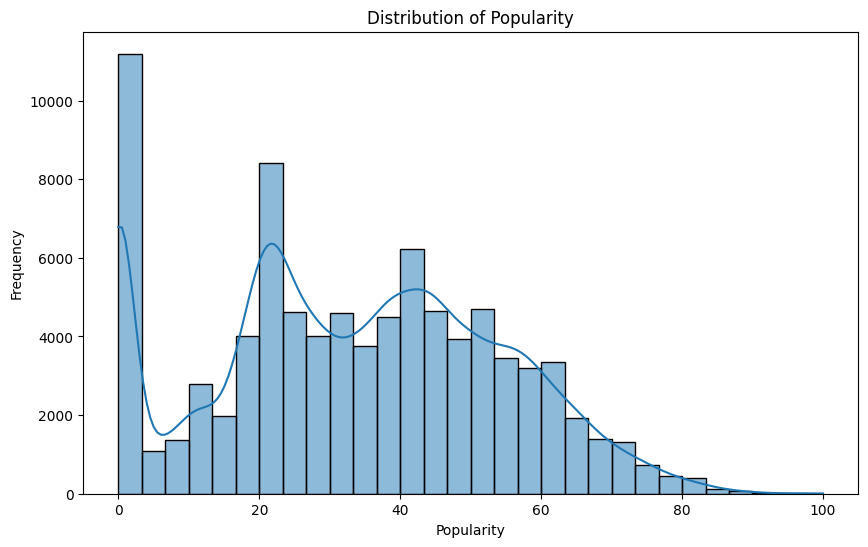

Mean popularity: 33.34690594339836
Mode popularity: 0    0
Name: popularity, dtype: int64
Median popularity: <bound method Series.median of 0        73
1        55
2        57
3        71
4        82
         ..
88261    21
88262    22
88263    22
88264    41
88265    22
Name: popularity, Length: 88266, dtype: int64>


In [14]:
# Popularity distribution

plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

mean_popularity = df['popularity'].mean()
print(f"Mean popularity: {mean_popularity}")
mode_popularity = df['popularity'].mode()
print(f"Mode popularity: {mode_popularity}")
median_popularity = df['popularity'].median
print(f"Median popularity: {median_popularity}")

In [5]:
# Statistiken
print(df['popularity'].describe())

# Anzahl der Nullwerte
print("Nullwerte:", (df['popularity'] == 0).sum())

# Wertehäufigkeit 
print(df['popularity'].value_counts().head(100))

count    112392.000000
mean         33.364652
std          22.361250
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64
Nullwerte: 15865
popularity
0      15865
21      2284
22      2283
44      2264
1       2134
       ...  
98         7
96         7
94         7
95         5
100        2
Name: count, Length: 100, dtype: int64


In [ ]:
# Predicting popularity by dancability

# 1) Create baseline model using only danceability
baseline = LinearRegression()

# 2) Prepare data (danceability as 2D array)
X_train_baseline = X_train_scaled[['danceability']].values.reshape(-1, 1)
X_test_baseline = X_test_scaled[['danceability']].values.reshape(-1, 1)

# 3) Train baseline model
baseline.fit(X_train_baseline, y_train)

# 4) Make predictions
y_pred_baseline_train = baseline.predict(X_train_baseline)
y_pred_baseline_test = baseline.predict(X_test_baseline)

# 5) Evaluate on test set
mse_baseline = mean_squared_error(y_test, y_pred_baseline_test)
rmse_baseline = np.sqrt(mse_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline_test)
r2_baseline = r2_score(y_test, y_pred_baseline_test)

# 6) Print results
print("="*50)
print("BASELINE MODEL (Danceability only)")
print("="*50)
print(f"MAE:  {mae_baseline:.4f}")
print(f"RMSE: {rmse_baseline:.4f}")
print(f"R²:   {r2_baseline:.4f}")
print("="*50)

BASELINE MODEL (Danceability only)
MAE:  17.0717
RMSE: 20.4752
R²:   0.0034


In [ ]:
# Predicting popularity by mean, median, and mode approximization


# 1) MEAN BASELINE - predict mean of training data for all test samples
mean_pred = np.mean(y_train)
y_pred_mean = np.full(len(y_test), mean_pred)

mse_mean = mean_squared_error(y_test, y_pred_mean)
rmse_mean = np.sqrt(mse_mean)
mae_mean = mean_absolute_error(y_test, y_pred_mean)
r2_mean = r2_score(y_test, y_pred_mean)

print("="*50)
print("BASELINE MODEL (Mean Approximization)")
print("="*50)
print(f"Predicted value: {mean_pred:.4f}")
print(f"MAE:  {mae_mean:.4f}")
print(f"RMSE: {rmse_mean:.4f}")
print(f"R²:   {r2_mean:.4f}")
print("="*50)


# 2) MEDIAN BASELINE - predict median of training data for all test samples
median_pred = np.median(y_train)
y_pred_median = np.full(len(y_test), median_pred)

mse_median = mean_squared_error(y_test, y_pred_median)
rmse_median = np.sqrt(mse_median)
mae_median = mean_absolute_error(y_test, y_pred_median)
r2_median = r2_score(y_test, y_pred_median)

print("="*50)
print("BASELINE MODEL (Median Approximization)")
print("="*50)
print(f"Predicted value: {median_pred:.4f}")
print(f"MAE:  {mae_median:.4f}")
print(f"RMSE: {rmse_median:.4f}")
print(f"R²:   {r2_median:.4f}")
print("="*50)


# 3) MODE BASELINE - predict mode (most frequent value) of training data
from scipy.stats import mode as scipy_mode
mode_result = scipy_mode(y_train)
mode_pred = mode_result.mode
y_pred_mode = np.full(len(y_test), mode_pred)

mse_mode = mean_squared_error(y_test, y_pred_mode)
rmse_mode = np.sqrt(mse_mode)
mae_mode = mean_absolute_error(y_test, y_pred_mode)
r2_mode = r2_score(y_test, y_pred_mode)

print("="*50)
print("BASELINE MODEL (Mode Approximization)")
print("="*50)
print(f"MAE:  {mae_mode:.4f}")
print(f"RMSE: {rmse_mode:.4f}")
print(f"R²:   {r2_mode:.4f}")
print("="*50)


# 4) COMPARISON TABLE
print("\n" + "="*70)
print("BASELINE MODELS COMPARISON")
print("="*70)
print(f"{'Model':<20} {'MAE':<15} {'RMSE':<15} {'R²':<15}")
print("-"*70)
print(f"{'Mean':<20} {mae_mean:<15.4f} {rmse_mean:<15.4f} {r2_mean:<15.4f}")
print(f"{'Median':<20} {mae_median:<15.4f} {rmse_median:<15.4f} {r2_median:<15.4f}")
print(f"{'Mode':<20} {mae_mode:<15.4f} {rmse_mode:<15.4f} {r2_mode:<15.4f}")
print("="*70)

BASELINE MODEL (Mean Approximization)
Predicted value: 33.2935
MAE:  17.1490
RMSE: 20.5122
R²:   -0.0002
BASELINE MODEL (Median Approximization)
Predicted value: 33.0000
MAE:  17.1516
RMSE: 20.5181
R²:   -0.0007
BASELINE MODEL (Mode Approximization)
MAE:  33.5606
RMSE: 39.3318
R²:   -2.6774

BASELINE MODELS COMPARISON
Model                MAE             RMSE            R²             
----------------------------------------------------------------------
Mean                 17.1490         20.5122         -0.0002        
Median               17.1516         20.5181         -0.0007        
Mode                 33.5606         39.3318         -2.6774        


In [ ]:
# Baseline OLS regression

baseline_ols = LinearRegression()
baseline_ols.fit(X_train_scaled, y_train)

y_pred_baseline = baseline_ols.predict(X_test_scaled)

# Calculate metrics
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print("="*50)
print("OLS BASELINE (All Features)")
print("="*50)
print(f"MAE:  {mae_baseline:.4f}")
print(f"RMSE: {rmse_baseline:.4f}")
print(f"R²:   {r2_baseline:.4f}")
print("="*50)


# Will not take OLS as baseline, too complex as baseline


OLS BASELINE (All Features)
MAE:  16.0731
RMSE: 19.6174
R²:   0.0852


In [ ]:
# 1. Extract list of all genre columns
genre_columns = [col for col in X_train_scaled.columns if col.startswith('genre_')]

# 2. Calculate mean popularity for each genre in training set
genre_means = {}
for genre in genre_columns:
    mean_pop = y_train[X_train_scaled[genre] == 1].mean()
    genre_means[genre] = mean_pop

# 3. Define prediction function
def genre_mean_predict(row, genre_means, genre_columns):
    # Find all genres assigned to this track (1 = assigned)
    assigned_genres = [genre for genre in genre_columns if row[genre] == 1]
    
    if not assigned_genres:
        # Fallback: if track has no genre, use global mean
        return np.mean(list(genre_means.values()))
    
    # For multi-label: average the means of all assigned genres
    genre_preds = [genre_means[genre] for genre in assigned_genres]
    return np.mean(genre_preds)

# 4. Generate predictions for test set
test_predictions = X_test_scaled.apply(
    lambda row: genre_mean_predict(row, genre_means, genre_columns), 
    axis=1
)


# 5. Evaluate baseline
r2 = r2_score(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Genre-based Baseline:")
print(f"  R²:   {r2:.4f}")
print(f"  MAE:  {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")


# will take this as baseline, as R^2 has value of aprox. 5%, provides solid baseline

Genre-based Baseline:
  R²:   0.0512
  MAE:  16.56
  RMSE: 19.98
